C:\Users\duih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [21:28:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


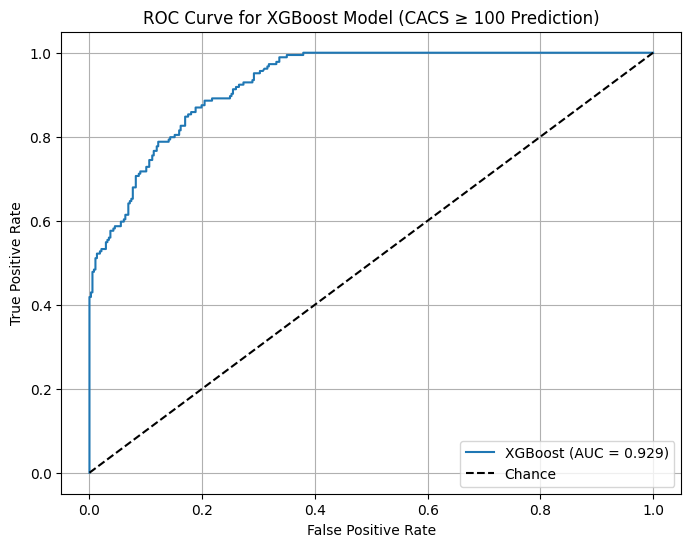

In [1]:
# 필요한 라이브러리
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_excel('CACS_dataset_with_binary.xlsx')

# Feature와 Outcome 설정
features = ['age', 'BMI', 'SBP', 'DBP', 'TC', 'LDL', 'HDL', 'TG', 'CRP', 'eGFR', 'NLR']
X = df[features]
y = df['CACS_binary']

# Train-Test Split (예: 80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성 및 학습
model = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 예측 및 ROC curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model (CACS ≥ 100 Prediction)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
